In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact, widgets, FloatSlider, IntSlider, Checkbox, Layout, Dropdown, Output, VBox, HBox
# import networkx as nx
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

from numpy import sin, cos, exp, pi, sqrt, linspace, arange, meshgrid

%matplotlib widget

# Uncomment the one that corresponds to your Jupyter theme
# plt.style.use('default')
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

plt.rcParams.update({
    "figure.figsize": (6, 6),
    "text.usetex": True,
    "font.family": "serif",
})

In [2]:
%%html
<style>
tr {
    font-size: 1.5em;
}
    li.thm {
        margin: 10px 0;
    }
    .shadow {
        /*Edit or add new attributes, change size, color, etc */
        width: 75%;
        box-shadow: 8px 8px 10px #444;
        border: 1px solid silver;

        /*For positioning in a jupyter notebook*/
        margin-top: 2em;
        position: relative;
        top: -25px
    }

    ol li {
        padding: .5em;
    }
</style>

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$

## One(-or-so)-minute Review

  - Distance between points in $\RR^n = \{(x_1, \dots,x_n): x_i \in \RR\}$ is measured by $$\sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$
  - A vector $\vec v$ is a directed line segment modulo location. 
  - It can be specified by the displacement in each coordinate. 
  $$\vec v = \langle v_1, v_2, v_3 \rangle $$
  - The **length** of a vector is (in $\RR^3$), the scalar
   $$|\vec v| = \sqrt{v_1^2+ v_2^2 + v_3^2}$$
  - Thus the distance between points with position vectors $\vec v $ and $\vec w$ is simply $|\vec v - \vec w|$.


<div style="padding-bottom: 40%"></div>

## Vector Operations

Let $\vec v, \vec w$ be vectors in $\RR^n$ and $c$ a scalar. 

| Operation | Notation | Formula | Output |
|---|---| --- |---|
| magnitude    | $|\vec v|$ | $$\sqrt{\sum v_i^2}$$ | scalar |
| scalar multiplication | $c \vec v$ | $$\langle c v_1, \ldots ,c v_n \rangle $$| vector |
| vector addition | $\vec v + \vec w$ | $$\langle v_1 + w_1,\ldots, v_n + w_n \rangle $$| vector |

<div style="padding-bottom: 40%"></div>

## Linear Combinations

A *linear combination* of vectors $\vec v$ and $\vec w$ is the expression $$a \vec v + b \vec w$$ where $a$ and $b$ are scalars.

In [15]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE)
    plt.ion()
    
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)

    ax.arrow(0,0,2,1,color='r',width=.02,head_width=.1,lw=4, length_includes_head=True)
    ax.arrow(0,0,-1/2,3/2,color='b',width=.02,head_width=.1,lw=4)
    
    sliderA = FloatSlider(min=-2,max=2, step=.01, description="$a$", value=1)
    sliderB = FloatSlider(min=-2,max=2, step=.01, description="$b$", value=0)
    
    def update(change):
        while len(ax.patches) > 2:
            ax.patches.pop()
        a, b = sliderA.value, sliderB.value
        ax.arrow(0,0,2*a,a,alpha = .3)
        ax.arrow(0,0,-b/2,b*3/2,alpha=.3)
        ax.arrow(0,0,2*a - b/2,a + b*3/2,color='purple', width=.02,head_width=.1,lw=4)
    
    for w in [sliderA, sliderB]:
        w.observe(update, names='value')
    
    return widgets.VBox([sliderA, sliderB, fig.canvas])

a("Linear Combinations")

<div style="padding-bottom: 40%"></div>

### Special Case

Consider a linear combination $c\vec v + d\vec w$ such that $c+d=1$. Which vectors result?

In [4]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    slider = FloatSlider(min=0, max=1, step=.01, value=0)
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)


    ax.grid(True)
    
    def update(change):
        ax.patches.clear()
        
        t = slider.value
        
        ax.arrow(0,0,2,1,color='r',width=.02,head_width=.1,lw=4,length_includes_head=True)
        ax.arrow(0,0,-1/2,3/2,color='b',width=.02,head_width=.1,lw=4,length_includes_head=True)
        ax.arrow(0,0,2*t,t,alpha = .3,length_includes_head=True)
        ax.arrow(0,0,-(1-t)/2,(1-t)*3/2,alpha=.3,length_includes_head=True)
        ax.arrow(0,0,2*t - (1-t)/2,t + (1-t)*3/2,color='purple', width=.02,head_width=.1,lw=4,length_includes_head=True)

    update({})
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("A special case")

We can see they form a line throw $\vec v$ and $\vec w$ by noting $d=1-c$, and thus,
$$c\vec v + d\vec w = c\vec v +(1-c)\vec w = \vec w + c(\vec v-\vec w)$$
so every such vector "starts" at $\vec w$ and moves some multiple of the direction toward $\vec v$.

<p style="padding-bottom:40%;"> </p>

# Special Basis Vectors

In $\RR^3$, since we use them so often, we define special basis vectors 
$$\vec i = \bv{1 \\ 0 \\ 0} \qquad \vec j = \bv{0 \\ 1  \\ 0} \qquad \vec k = \bv{0 \\ 0 \\ 1 }$$

Then every vector is an obvious linear combination of these. 
$$\langle a, b, c \rangle = a\,\vec i + b\,\vec j + c\,\vec k$$

<p style="padding-bottom:40%;"> </p>

# Lecture 02

Objectives:
  - Dot product
    - definition
    - algebraic and geometric views
  - Cross product
    - definition
    - mnemonic
    - key properties
 
 References:
   - Openstax (Strang et al)
     - [§1.3 The Dot Product](https://openstax.org/books/calculus-volume-3/pages/2-3-the-dot-product) 
     - [§1.4 The Cross Product](https://openstax.org/books/calculus-volume-3/pages/2-4-the-cross-product)

<p style="padding-bottom:40%;"> </p>

## The Dot Product

We expand our list of vector operations with the **dot** (or **inner** or **scalar**) **product**.

$$\vec v \cdot \vec w = \sum_{i=1}^n v_i w_i$$

#### Examples

  - $\langle 4,2, -1 \rangle \cdot \langle -2,6, 0 \rangle = -8 + 12 + 0 = 4 $

  - Compare: $$\begin{bmatrix} 4 \\ 2 \\ -1 \end{bmatrix}\cdot \begin{bmatrix} 2 \\ 6 \\ 0 \end{bmatrix} = -8 + 12 = 4 $$

  - $\vec i \cdot \vec i = 1$

  - $\vec i \cdot \vec j = \vec i \cdot \vec k = \vec j \cdot \vec k = 0$

### 

<p style="padding-bottom:40%;"> </p>

## Properties of the dot product. 

  - $\vec v \cdot \vec v = |\vec v |^2 = v_1^2 + v_2^2 + \ldots$

  - $\vec v \cdot \vec 0 = 0$

  - $\vec v \cdot \vec w = \vec w \cdot \vec v$

  - $(c\vec u + d\vec v) \cdot \vec w = c(\vec u \cdot \vec w) + d (\vec v \cdot \vec w)$

<p style="padding-bottom:40%;"> </p>

### Exercise

In [5]:
url="https://embed.polleverywhere.com/multiple_choice_polls/m8rI2GBEJASfzT4uT3S8v?controls=none&short_poll=true"
IFrame(src=url, width=800, height=600)

## Dot products and angles

In [6]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE)
    plt.ion()
    
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.grid(True)

    t = linspace(0,1,100)

    sliderA = FloatSlider(min=-pi, max = 2*pi, step = pi/60, description=r"$\alpha$")
    sliderT = FloatSlider(min=0, max = 2*pi, step = pi/60, value=pi/4, description=r"$\theta$")
    
    def update(change):
        while ax.lines:
            ax.lines.pop()
        while ax.collections:
            ax.collections.pop()          
        while ax.texts:
            ax.texts.pop()            
        
        al,th = sliderA.value, sliderT.value
        
        ax.quiver(0,0,3/sqrt(2)*cos(al),
             3/sqrt(2)*sin(al),color='r',angles='xy', scale_units='xy', scale=1)
        ax.quiver(0,0,sqrt(2)*cos(th+al),
                 sqrt(2)*sin(th+al),color='b',
                 angles='xy', scale_units='xy', scale=1)

        ax.text(0,3.5,f"$\\vec v\\cdot\\vec w = {3*cos(th):.4f}$",fontsize=22)
        ax.plot(cos(al + t*th)/2, sin(al + t*th)/2,c='b', zorder=-1)
        if th > 0:
            ax.text(cos(th/2 + al),sin(th/2 + al),f"$\\theta$",fontsize=22, ha='center', va='center')
        ax.plot(cos(al*t)/3*2, sin(al*t)/3*2,zorder=-1,c='r')
        if al > 0:
            ax.text(cos(al/2),sin(al/2),f"$\\alpha$",fontsize=22, ha='center', va='center')
    
    for w in [sliderA, sliderT]:
        w.observe(update, names='value')
    
    update({})
    
    return VBox([sliderA, sliderT, fig.canvas])

a("Dot Products and Angles")

<p style="padding-bottom:40%;"> </p>

## Geometric View

The following formula best summarizes the significance of the dot product. 

$$\vec v \cdot \vec w = |\vec v | | \vec w | \cos \theta $$

where $\theta$ is the angle between the vectors. 

This equation holds in any dimension. 

<p style="padding-bottom:40%;"> </p>

<div class="alert alert-block alert-info shadow">
<strong>Definition</strong>
    
<p>Two vectors $\vec v$ and $\vec w$ are <b>orthogonal</b> provided $\vec v \cdot \vec w =0$. </p>

<p>*Perpendicular*, usually for dimesions 2 and 3, is also acceptable.</p>
</div>

<p style="padding-bottom:40%;"> </p>


### [Exercise](https://PollEv.com/multiple_choice_polls/XohgLLf7HHGw0swRP3OL1/respond)

What angle does the line $x = y = z$ make with the $xy$-plane?

In [7]:
src="https://embed.polleverywhere.com/multiple_choice_polls/kdscgCqDWSbzqUevoaQdb?controls=none&short_poll=true"
IFrame(src=src, width=800, height=600)

<p style="padding-bottom:40%;"> </p>

## Projection

Let $\vec v = \langle 5, 1 \rangle$ and $\vec w = \langle 1,1 \rangle$. Find the scalar $c$ such that $$ |\vec v - c\vec w|$$ is as small as possible.

**Reinterpretation**
> Find the multiple of vector $\vec w $ *closest* to $\vec v$.



In [8]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE)
    plt.ion()

    slider = FloatSlider(min=0, max = 7, step=.1)
    ax.grid()
    ax.set_xlim([0,8])
    ax.set_ylim([0,8])

    ax.text(5,3,f"$\\vec v$",size=18)
    ax.arrow(0,0,5,3,color='r',width=.02,head_width=.1,lw=2,length_includes_head=True)
    cv = ax.arrow(0,0,1, 1,color='b',width=.02,head_width=.1,lw=3, length_includes_head=True)

    c = slider.value
    t1 = ax.text(2,7,f"$|\\vec v- c \\vec w | = {np.linalg.norm(np.array([5-c,3-c])):.4f}$",size=22)
    t2 = ax.text(c-1,c,f"${c:.1f}\\vec w$",size=18)
    
    def update(change):
        c = slider.value

        cv.set_data(dx=c,dy=c)

        t1.set_text(f"$|\\vec v- c \\vec w | = {np.linalg.norm(np.array([5-c,3-c])):.4f}$")
        t2.set_x(c-1)
        t2.set_y(c)
        t2.set_text(f"${c:.1f}\\vec w$")
    
    slider.observe(update, names='value')
    update({})
    
    return VBox([slider, fig.canvas])

a("As close as possible")

<p style="padding-bottom:40%;"> </p>

In [9]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE)
    plt.ion()

    slider = FloatSlider(min=0, max = 7, step=.1)
    ax.grid()
    ax.set_xlim([0,8])
    ax.set_ylim([0,8])

    ax.text(5,3,f"$\\vec v$",size=18)
    ax.arrow(0,0,5,3,color='r',width=.02,head_width=.1,lw=2,length_includes_head=True)
    cv = ax.arrow(0,0,1, 1,color='b',width=.02,head_width=.1,lw=3, length_includes_head=True)

    c = slider.value
    t1 = ax.text(2,7,f"$|\\vec v- c \\vec w | = {np.linalg.norm(np.array([5-c,3-c])):.4f}$",size=22)
    t2 = ax.text(c-1,c,f"${c:.1f}\\vec w$",size=18)
    a2 = ax.arrow(c,c,5-c,3-c,color='k',alpha = .3,width=.02,head_width=.1,lw=3, length_includes_head=True)

    ax.plot([0,8],[0,8],'--')

    def update(change):
        c = slider.value

        cv.set_data(dx=c,dy=c)
        a2.set_data(x=c, y=c, dx= 5-c, dy=3 - c)
        
        t1.set_text(f"$|\\vec v- c \\vec w | = {np.linalg.norm(np.array([5-c,3-c])):.4f}$")
        t2.set_x(c-1)
        t2.set_y(c)
        t2.set_text(f"${c:.1f}\\vec w$")
    
    slider.observe(update, names='value')
    update({})
    
    return VBox([slider, fig.canvas])

a("Projection")

<p style="padding-bottom:40%;"> </p>

<div class="alert alert-block alert-info shadow">
<strong>Definitions</strong>
    
Suppose $\vec b \neq \vec 0$.

The <b>vector projection</b> of the vector $\vec a$ onto $\vec b$ is 
$$\operatorname{proj}_\vec b \vec a = \frac{\vec a \cdot \vec b}{\vec b \cdot \vec b} \vec b. $$

The <b>scalar projection</b> (or <em>component</em>) of the vector $\vec a$ onto $\vec b$ is 
$$\operatorname{comp}_\vec b \vec a = \frac{\vec a \cdot \vec b}{|\vec b|}. $$

</div>

Note: The notation for the latter comes from the "*comp*onent of $\vec a$ in the $\vec b$ direction."

Furthermore, let $\vec u = \frac{\vec b}{|\vec b|}$, the normalization of $\vec b$. Then,

$$\operatorname{proj}_\vec b \vec a = (\operatorname{comp}_\vec b \vec a)\vec u = (\vec a \cdot \vec u)  \vec u.$$

<p style="padding-bottom:40%;"> </p>

### [Exercises](https://pollev.com/dcy2)

In [10]:
url = "https://embed.polleverywhere.com/multiple_choice_polls/wsaqPHN8xerNCVtEpW0r2?controls=none&short_poll=true"
IFrame(src=url, width=800, height=600)

In [11]:
url = "https://embed.polleverywhere.com/multiple_choice_polls/xm3Wne3aZE7oNXH0uRFXH?controls=none&short_poll=true"
IFrame(src=url, width=800, height=600)

<div style="padding-bottom: 40%"></div>

### Exercise 

The (infinitely long) finish line to a boat race is modeled by $3x + 4y = 12$. Boat $A$ is at position $(3/2, 0)$ and boat $B$ is at $(-1, 1)$. Which is winning?

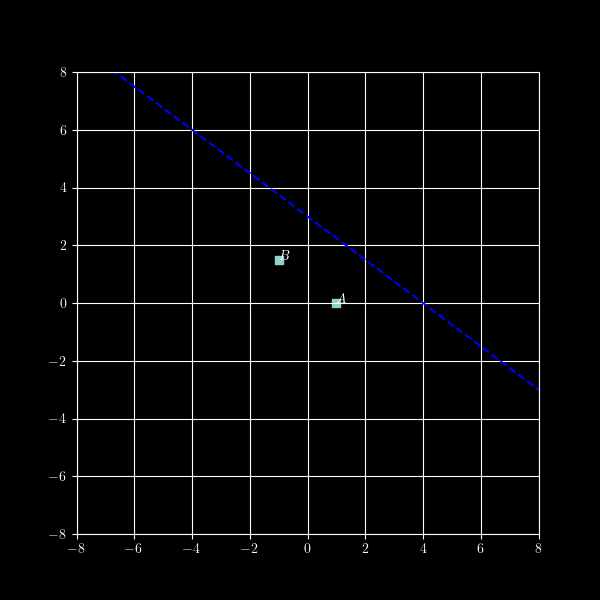

In [12]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE)
    plt.ion()
    
    ax.plot([-8,10],[9,-18/4],'b',linestyle='dashed')
    ax.set_xlim([-8,8])
    ax.set_ylim([-8,8])
    ax.grid(True)
    ax.set_aspect('equal')
    ax.text(1,0,'$A$')
    ax.text(-1,3/2,'$B$')
    ax.scatter([1,-1],[0,3/2],marker='s');
    
    return fig.canvas

a("Boat Race")

<p style="padding-bottom:40%;"> </p>

# Cross Product

It turns out $\RR^3$ is special. There happens to be a vector 'multiplication' of two vectors $$\vec v \times \vec w$$ that gives a new vector. This **does not work** in $\RR^2$ (and most other dimensions).

The following properties actually define the cross product.

  - $\vec v \times \vec w$ is bilinear. 

  - $\vec v \times \vec w  = - \vec w \times \vec v $ (antisymmetry)

  - $\vec i \times \vec j = \vec k$
  - $\vec j \times \vec k = \vec i$
  - $\vec k \times \vec i = \vec j$
  

<p style="padding-bottom:40%;"> </p>

## Formula

$$ \langle a,b,c \rangle\times \langle d,e,f \rangle = (a\vec i + b\vec j + c \vec k)\times(d\vec i + e\vec j + f \vec k)$$

$$ = \begin{vmatrix} \vec i & \vec j & \vec k \\a &b &c \\ d & e & f \\ \end{vmatrix} $$

<p style="padding-bottom:40%;"> </p>

## Properties of $\vec v \times \vec w$

  - $\vec v \times \vec w$ is perpendicular to *both* $\vec v $ and $\vec w$.

  - $\vec v \times \vec w$ points in the direction according to the right-hand-rule.

  - $|\vec v \times \vec w| = |\vec v ||\vec w|\sin\theta$ where theta is the (positive) angle between the vectors.

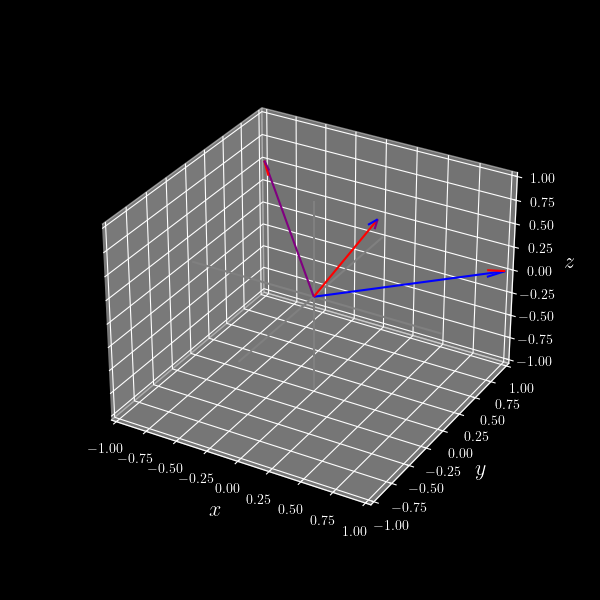

In [13]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d') 
    
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'gray')
    ax.plot([0,0],[-1,1],[0,0],'gray')
    ax.plot([0,0],[0,0],[-1,1],'gray')   

    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.set_autoscale_on(True)
    
    t = 1/2
    
    v= np.array((1,1,0))
    w =np.array((1-t,-1/2 + t,1))
    u = np.cross(w,v)
    for c in 'xyz':
        getattr(ax,f"set_{c}label")(f"${c}$",fontsize=16)
        getattr(ax,f"set_{c}lim")([-1,1])
    origin = [0,0,0]
    X, Y, Z = zip(origin,origin,origin) 
    U, V, W = zip(v,w,u)
    ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.1,colors=['b','r','purple'])
    
    return fig.canvas

a("A cross product")

<p style="padding-bottom:40%;"> </p>

### Exercises

  1. Find a unit vector perpendicular to $\langle 1,2,-1\rangle$ and $\langle 3,0,1\rangle$. Is there only one?
  

  2. Suppose that $\vec a$ is a nonzero vector in $\RR^3$.
  
  - If $\vec a \cdot \vec b = \vec a \cdot \vec c$, does it follow that $\vec b = \vec c$?
    
  - If $\vec a \times \vec b= \vec a \times \vec c$, does it follow that $\vec b = \vec c$?
    
  - If both conditions above hold, does it follow that $\vec b = \vec c$?

<p style="padding-bottom:40%;"> </p>

# Areas & Volumes

We won't need this immediately, but put it in the back of your mind as it will come back later. 

Let $\vec a$ and $\vec b$ define the nonparallel edges of a parallelogram. 

In [14]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))

    plt.ioff()
    fig,ax = plt.subplots(num=TITLE)
    plt.ion()

    slider = FloatSlider(min=0, max = 3.5, value=2)

    c =slider.value
    
    ax.grid()
    ax.set_xlim([0,8])
    ax.set_ylim([0,8])
    
    ax.arrow(0,0,4,1,color='r',width=.02,head_width=.1,lw=2,length_includes_head=True)
    a1 = ax.arrow(0,0,c,2*c,color='b',width=.02,head_width=.1,lw=2,length_includes_head=True)
    a2 = ax.arrow(c,2*c,4,1,color='r',width=.02,head_width=.1,lw=2,length_includes_head=True)
    a3 = ax.arrow(4,1,c,2*c,color='b',width=.02,head_width=.1,lw=2,length_includes_head=True)
    f1 = ax.fill([0,4,4+c,c],[0,1,2*c + 1,2*c],alpha=.5,zorder=-1)[0]
    p1 = ax.plot([c,c*3/8*4,0],[2*c,c*3/8,0],'--')[0]

    t1 = ax.text(c*5/4,c*19/16,"h",size=18)
    
    def update(change):
        c = slider.value
        t1.set_x(c*5/4)
        t1.set_y(c*19/16)
        
        a1.set_data(dx=c, dy=2*c)
        a2.set_data(x=c, y=2*c)
        a3.set_data(dx=c, dy=2*c)
        
        f1.set_xy(np.array([[0,4,4+c,c],[0,1,2*c + 1,2*c]]).transpose())
        p1.set_data([c,c*3/8*4,0],[2*c,c*3/8,0])
        
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("Areas")

Then the height $h = $

and the area $A = $

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>